**Install ntscraper**

In [ ]:
!pip install ntscraper

**Import necesaary libraries**

In [ ]:
import re
from ntscraper import Nitter
from collections import Counter
import matplotlib.pyplot as plt
from transformers import AutoModelForSequenceClassification, AutoTokenizer
from scipy.special import softmax

**Tweets Scraping**

In [ ]:
# Assuming tweets is a dictionary with 'tweets' as a list of tweet information
scraper = Nitter(log_level=1,skip_instance_check=False)
tweets = scraper.get_tweets('Data',mode='hashtag',number=100)

Testing instances: 100%|██████████| 77/77 [01:36<00:00,  1.25s/it]
INFO:root:No instance specified, using random instance https://nitter.privacydev.net
INFO:root:Current stats for Data: 16 tweets, 0 threads...
INFO:root:Current stats for Data: 34 tweets, 0 threads...
INFO:root:Current stats for Data: 47 tweets, 0 threads...
INFO:root:Current stats for Data: 62 tweets, 0 threads...


**Load Model and Tokenizer**

In [ ]:
# Load model and tokenizer
roberta = "cardiffnlp/twitter-roberta-base-sentiment"
model = AutoModelForSequenceClassification.from_pretrained(roberta)
tokenizer = AutoTokenizer.from_pretrained(roberta)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/747 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/499M [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/150 [00:00<?, ?B/s]

**Hashtag Analysis**

In [ ]:
# Initialize the hashtag counter outside the loop
hashtag_counts = Counter()

for tweet in tweets['tweets']:
    # Preprocess tweet
    tweet_words = []
    for word in tweet['text'].split():
        if word.startswith('@') and len(word) > 1:
            word = '@user'
        elif word.startswith('http'):
            word = "http"
        tweet_words.append(word)
    tweet_proc = " ".join(tweet_words)

    # Extract hashtags and count them
    hashtags = re.findall(r'#\w+', tweet_proc.lower())
    hashtag_counts.update(hashtags)

    # Perform sentiment analysis (omitted actual processing for brevity)
    encoded_tweet = tokenizer(tweet_proc, return_tensors='pt')
    output = model(**encoded_tweet)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)

**Hashtags Visualization**

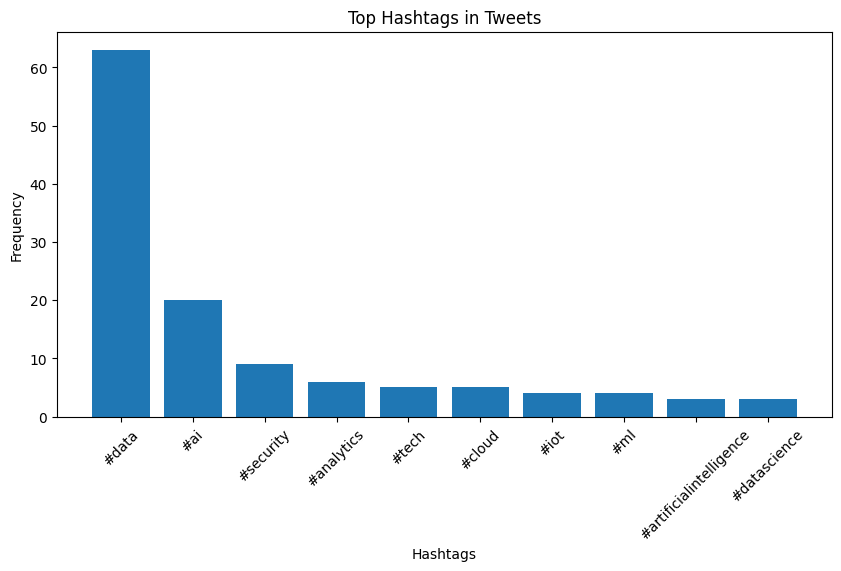

In [ ]:
# Prepare data for visualization
most_common_hashtags = hashtag_counts.most_common(10)  # Adjust number to display more or fewer hashtags
labels, values = zip(*most_common_hashtags)

# Create a bar chart
plt.figure(figsize=(10, 5))
plt.bar(labels, values)
plt.xlabel('Hashtags')
plt.ylabel('Frequency')
plt.title('Top Hashtags in Tweets')
plt.xticks(rotation=45)
plt.show()